In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vrani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vrani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
val = pd.read_csv('twitter_validation.csv',header=None)
train = pd.read_csv('twitter_training.csv',header=None)

In [3]:
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
train.columns = ['id','information','type','text']
val.columns = ['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
train_data = train.copy()
val_data = val.copy()

<b>TEXT TRANSFORMATION</b>

In [6]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [7]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [8]:
train_data['type'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

<b>VISUALIZATION</b>

POSITIVE WORD CLOUD

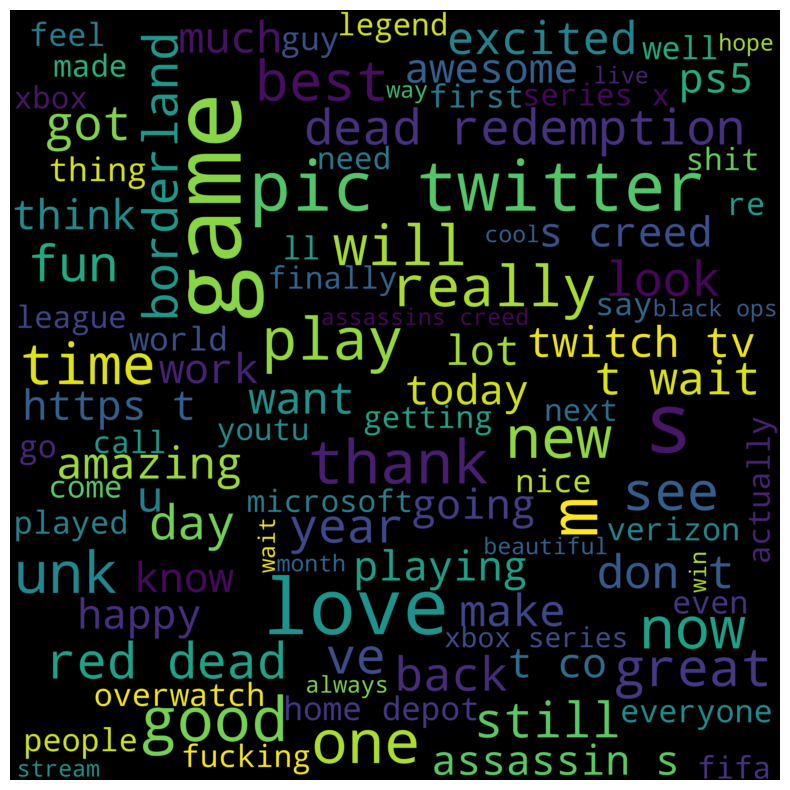

In [9]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
Wordcloud = WordCloud(max_font_size = 100, max_words = 100 , background_color = 'black' , scale = 10 , height = 800 , width = 800).generate(word_cloud_text)
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(Wordcloud , interpolation='bilinear')
plt.show()

NEGATIVE WORD CLOUD

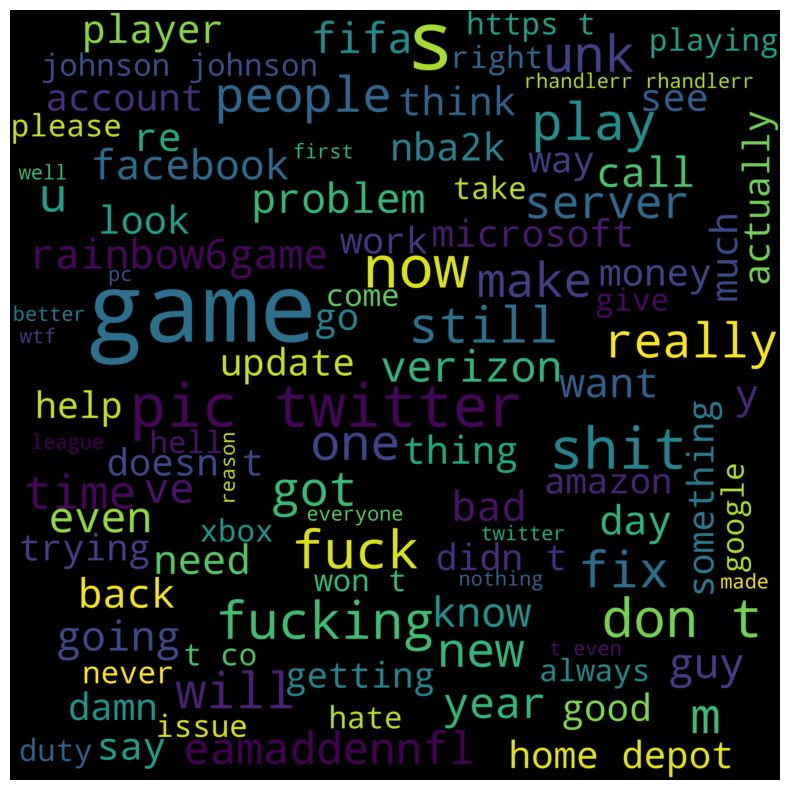

In [10]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
Wordcloud = WordCloud(max_font_size = 100, max_words = 100 , background_color = 'black' , scale = 10 , height = 800 , width = 800).generate(word_cloud_text)
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(Wordcloud , interpolation='bilinear')
plt.show()

NEUTRAL WORD CLOUD

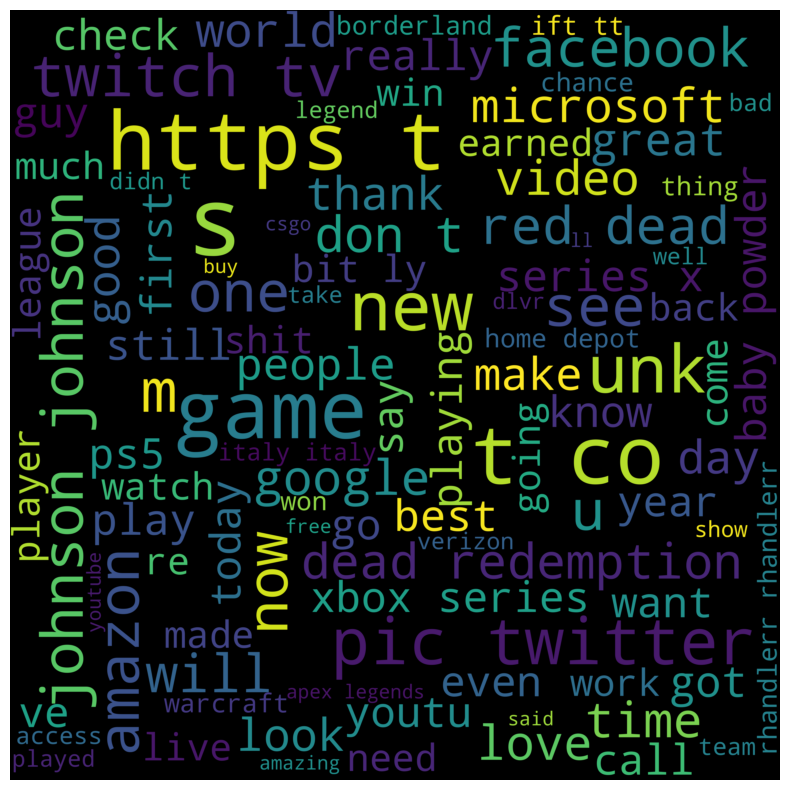

In [11]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
Wordcloud = WordCloud(max_font_size = 100, max_words = 100 , background_color = 'black' , scale = 10 , height = 800 , width = 800).generate(word_cloud_text)
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(Wordcloud , interpolation='bilinear')
plt.show()

IRRELEVANT WORD CLOUD

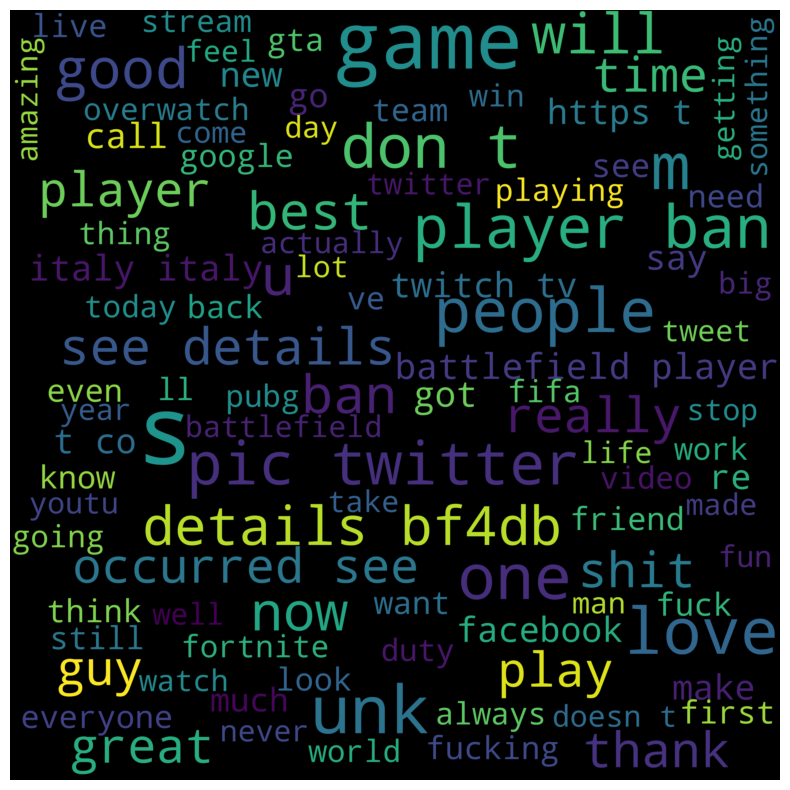

In [12]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
Wordcloud = WordCloud(max_font_size = 100, max_words = 100 , background_color = 'black' , scale = 10 , height = 800 , width = 800).generate(word_cloud_text)
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(Wordcloud , interpolation='bilinear')
plt.show()

In [13]:
plot1 = train.groupby(['information','type']).count().reset_index()
plot1.head()

,information,type,id,text
0,Amazon,Irrelevant,192,186
1,Amazon,Negative,576,575
2,Amazon,Neutral,1236,1207
3,Amazon,Positive,312,308
4,ApexLegends,Irrelevant,192,192


Text(0.5, 1.0, 'Distribution of Tweets per Branch and Type')

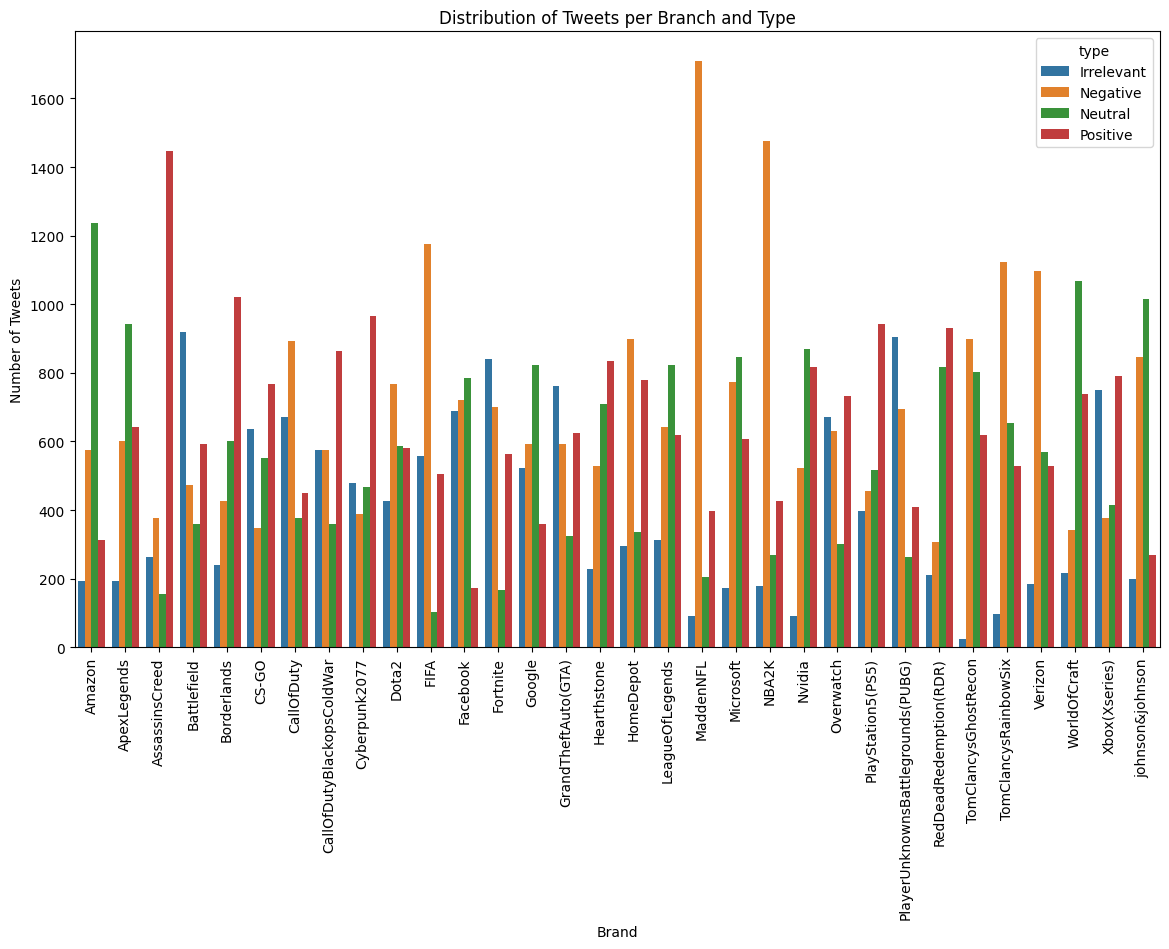

In [14]:
plt.figure(figsize=(14,8))
sns.barplot(data=plot1 , x = 'information' , y = 'id' , hue = 'type')
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Tweets per Branch and Type")

<b>TEXT ANALYSIS</b>

In [15]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


In [16]:
tokens_counter[1]

'getting'

In [17]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

<b>MODEL</b>

In [18]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [19]:
reviews_train , reviews_test = train_test_split(train_data , test_size=0.2 , random_state= 0)

In [20]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

C:\Users\vrani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\vrani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [22]:
X_test_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 161222 stored elements and shape (14937, 28993)>

In [23]:
y_train_bow = reviews_train['type'] 
y_test_bow = reviews_test['type']

In [24]:
y_test_bow.value_counts() / y_test_bow.shape[0]

type
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

In [26]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  81.50900448550578


C:\Users\vrani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
